In [1]:
# Packages
import numpy as np
import idx2numpy
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
# Import Data
X_train = idx2numpy.convert_from_file("data/train-images-idx3-ubyte").reshape(60000,-1)
y_train = idx2numpy.convert_from_file("data/train-labels-idx1-ubyte")
X_test = idx2numpy.convert_from_file("data/t10k-images-idx3-ubyte").reshape(10000,-1)
y_test = idx2numpy.convert_from_file("data/t10k-labels-idx1-ubyte")

In [3]:
# Split Train/Development Sets
r = 4 #Random State
X_train,X_dev,y_train,y_dev = train_test_split(X_train, y_train, test_size=0.3, random_state=r)

### Explanation of Different Sets
(Thank you for pointing out this was missing!)

- Training: This set is used to fit the model to the data. It should be the largest, as the model will need as much data as possible in order to learn the relationships between variables. It is kept separate from the test/dev sets in order to prevent the results from being tainted by pre-existing knowledge the model has gained from this set.


- Development: This set is used for tuning the model. It is kept separate from the test set so that the final model can be tested on a set that it is completely unfamiliar with.


- Test: This is the final set used. It must be comprised of data that hasn't had any contact with the model prior to this point in order to get an unbiased representation of how accurate the model is in its predictions.

In [4]:
# Fit Model
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

### Tuning

Chosen Parameter: I will be tuning the max depth parameter, as this has a heavy bearing on the performance and accuracy of the model and will likely see the most drastic improvements. The performance improvment will likely help due to the size of the data set.

2 - 0.6511666666666667
3 - 0.7540555555555556
4 - 0.8113888888888889
5 - 0.8574444444444445
6 - 0.8841666666666667
7 - 0.9061666666666667
8 - 0.9220555555555555
9 - 0.9323888888888889
10 - 0.9423888888888889
11 - 0.9523333333333334
12 - 0.9551666666666667
13 - 0.9585
14 - 0.9625
15 - 0.9630555555555556
16 - 0.9637777777777777
17 - 0.9649444444444445
18 - 0.9655
19 - 0.9663333333333334
20 - 0.9657222222222223
21 - 0.9665
22 - 0.9663333333333334
23 - 0.9654444444444444
24 - 0.9656111111111111
25 - 0.9661111111111111
26 - 0.9653333333333334
27 - 0.9666666666666667
28 - 0.9657777777777777
29 - 0.966


Text(0, 0.5, 'Accuracy')

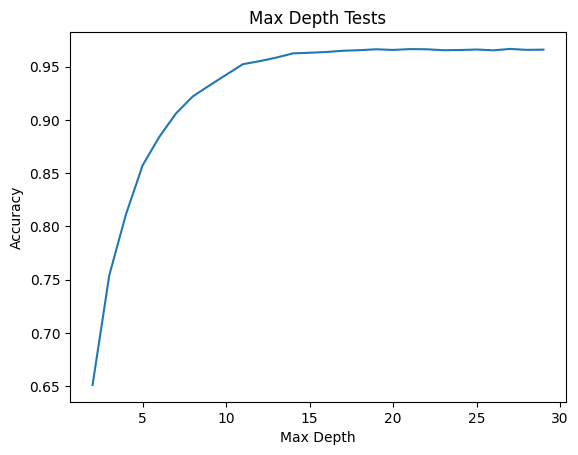

In [5]:
# Tuning Tests
depths = list(range(2,30))
scores = []

for depth in depths:
    tune_model = RandomForestClassifier(max_depth=depth, random_state=r)
    tune_model.fit(X_train,y_train)
    tune_pred = tune_model.predict(X_dev)
    tune_acc = accuracy_score(y_dev,tune_pred)
    scores.append(tune_acc)
    print(f"{depth} - {tune_acc}")

plt.plot(depths,scores)
plt.title("Max Depth Tests")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

For the max depth value I will be choosing 19, as after this the accuracy score plateaus.

In [6]:
# Final Model
final_model = RandomForestClassifier(max_depth=19, random_state=r)
final_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=19, random_state=4)

In [7]:
# Confusion Matrix
final_prediction = final_model.predict(X_test)
cf = confusion_matrix(y_test,final_prediction)

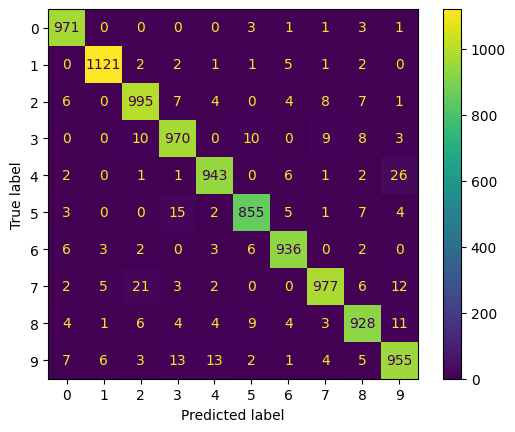

In [8]:
disp = ConfusionMatrixDisplay(cf)
disp.plot()

The two values the model seems to struggle with the most are:

- "4" - Incorrectly identified as the number "9" 26 times
- "7" - Incorrectly identified as the number "2" 21 times

In [9]:
# Scores
acc = accuracy_score(y_test,final_prediction)
pre = precision_score(y_test,final_prediction, average="weighted")
rec = recall_score(y_test,final_prediction, average="weighted")
f1 = f1_score(y_test,final_prediction, average="weighted")

# Print
print(f"Accuracy: {acc}")
print(f"Precision: {pre}")
print(f"Recall: {rec}")
print(f"F1: {f1}")

Accuracy: 0.9651
Precision: 0.9651225256305106
Recall: 0.9651
F1: 0.9650810970246178
